In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from acquire import get_titanic_data
from prepare import prep_titanic_data,train_validate_test_split


In [217]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [218]:
df = get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [172]:
df= df.drop(columns=['Unnamed: 0','passenger_id','deck','age','embarked','pclass'])
df['embark_town']= df.embark_town.fillna(value='southampton')
df.head()


,survived,sex,sibsp,parch,fare,class,embark_town,alone
0,0,male,1,0,7.2500,Third,Southampton,0
1,1,female,1,0,71.2833,First,Cherbourg,0
2,1,female,0,0,7.9250,Third,Southampton,1
3,1,female,1,0,53.1000,First,Southampton,0
4,0,male,0,0,8.0500,Third,Southampton,1


In [173]:
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()

,survived,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton,embark_town_southampton
0,0,1,0,7.2500,0,1,0,1,0,1,0
1,1,1,0,71.2833,0,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,0,1,0,1,0
3,1,1,0,53.1000,0,0,0,0,0,1,0
4,0,0,0,8.0500,1,1,0,1,0,1,0


# Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

- ### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [174]:
#survival classifier
#yes = negative
#no= positive

# baseline prediction:
df.survived.value_counts()
#0=did not survive, 1=survive


#since number of people survived is outnumbered by no. of deads , so we take dead as baseline prediction


0    549
1    342
Name: survived, dtype: int64

In [175]:
# baseline accuracy baseline_accuracy=(copy.survived == copy.baseline).mean()
print(f'Baseline Accuracy:{baseline_accuracy:.2%}')

Baseline Accuracy:61.62%


- ### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [176]:
train,validate,test= prepare.train_validate_test_split(df, stratify_by='survived')

NameError: name 'prepare' is not defined

X_train.head()

In [132]:
y_train[:5]

456     No
8      Yes
19     Yes
95      No
86      No
Name: survived, dtype: string

In [133]:
y_train.value_counts()

No     298
Yes    200
Name: survived, dtype: Int64

In [135]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 26.12
|   |   |   |--- fare <= 13.43
|   |   |   |   |--- class: Yes
|   |   |   |--- fare >  13.43
|   |   |   |   |--- class: Yes
|   |   |--- fare >  26.12
|   |   |   |--- class: Yes
|   |--- pclass >  2.50
|   |   |--- fare <= 24.81
|   |   |   |--- fare <= 6.99
|   |   |   |   |--- class: No
|   |   |   |--- fare >  6.99
|   |   |   |   |--- class: Yes
|   |   |--- fare >  24.81
|   |   |   |--- class: No
|--- sex_male >  0.50
|   |--- pclass <= 1.50
|   |   |--- fare <= 26.14
|   |   |   |--- class: No
|   |   |--- fare >  26.14
|   |   |   |--- fare <= 30.60
|   |   |   |   |--- class: Yes
|   |   |   |--- fare >  30.60
|   |   |   |   |--- class: No
|   |--- pclass >  1.50
|   |   |--- fare <= 7.91
|   |   |   |--- embark_town_Southampton <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- embark_town_Southampton >  0.50
|   |   |   |   |--- class: No
|   |   |--- fare >  7.91
|   |   |   |--- embark_town_S

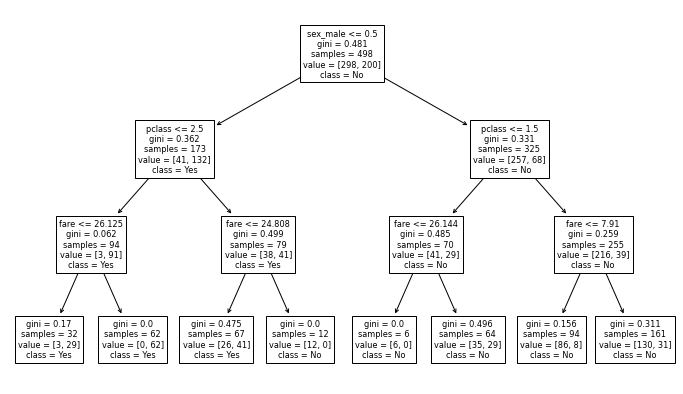

In [120]:
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [121]:
tree.predict(X_train)

array(['No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
 

In [122]:
predictions = tree.predict(X_train)
actual = y_train

In [123]:
confusion_matrix(actual, predictions)

array([[269,  29],
       [ 68, 132]])

In [124]:
pd.crosstab(actual, predictions)

col_0,No,Yes
survived,,
No,269,29
Yes,68,132


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


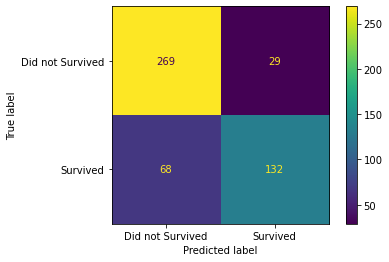

In [125]:
plot_confusion_matrix(tree, X_train, y_train, display_labels=['Did not Survived', 'Survived'])

In [109]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.80      0.90      0.85       298
         Yes       0.82      0.66      0.73       200

    accuracy                           0.81       498
   macro avg       0.81      0.78      0.79       498
weighted avg       0.81      0.81      0.80       498



In [126]:
TP=269
TN=132
FP=68
FN= 29
accuracy=(TP + TN)/(TP+TN+FP+FN)
recall = (TP)/(TP+TN)
precision = (TP)/(TP+FP)
print("Accuracy is", accuracy)
print("Recall is",round(recall,2))
print("Precision is",round(precision, 2))


Accuracy is 0.8052208835341366
Recall is 0.67
Precision is 0.8


- ### 3.Evaluate your in-sample results using the model score, confusion matrix, and classification report.

- ### 4.Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through st

- ### 5.Run through steps 2-4 using a different max_depth value.



- ### 6. Which model performs better on your in-sample data?





- ### 7. Which model performs best on your out-of-sample data, the validate set?

### Random Forest Tree

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [179]:
df=get_titanic_data()
df= df.drop(columns=['Unnamed: 0','passenger_id','deck','age','embarked','pclass'])
df['embark_town']= df.embark_town.fillna(value='southampton')
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()


,survived,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton,embark_town_southampton
0,0,1,0,7.2500,0,1,0,1,0,1,0
1,1,1,0,71.2833,0,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,0,1,0,1,0
3,1,1,0,53.1000,0,0,0,0,0,1,0
4,0,0,0,8.0500,1,1,0,1,0,1,0


In [180]:
# calling function train_validate_test_split from prepare.py
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

In [184]:
x_train = train.drop(columns=['survived'])
y_train = train.survived

x_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

x_test = test.drop(columns=['survived'])
y_test = test.survived

In [185]:
x_train.head()

,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton,embark_town_southampton
583,0,0,40.1250,1,1,0,0,0,0,0
165,0,2,20.5250,0,1,0,1,0,1,0
50,4,1,39.6875,0,1,0,1,0,1,0
259,0,1,26.0000,0,0,1,0,0,1,0
306,0,0,110.8833,1,0,0,0,0,0,0


In [188]:
# from random forrest
rf= RandomForestClassifier(max_depth =3, random_state=123)
rf

RandomForestClassifier(max_depth=3, random_state=123)

In [189]:
rf.fit(x_train, y_train)
print(rf.feature_importances_)

[0.06531504 0.03087545 0.16049196 0.0360071  0.52146188 0.01980471
 0.11941945 0.01173556 0.03369202 0.00119683]


In [ ]:
#highest feature value = 0.52 which is the column 'Sex'
# Now making predictions

In [190]:
y_pred= rf.predict(x_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [191]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.83


In [193]:
#create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[287  20]
 [ 67 124]]


In [196]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       307
           1       0.86      0.65      0.74       191

    accuracy                           0.83       498
   macro avg       0.84      0.79      0.80       498
weighted avg       0.83      0.83      0.82       498



In [197]:
#validate the model
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.79


In [228]:
dframe=[]
for i in range(1,25):
    
    rf= RandomForestClassifier(max_depth =i, random_state=123)
    rf.fit(x_train, y_train)
    y_pred= rf.predict(x_train)
    
    output={"max_depth":i,
    'train_set_accuracy': format(rf.score(x_train, y_train)),
    'validate_set_accuracy':format(rf.score(X_validate, y_validate))
    }
    
    dframe.append(output)
    
df= pd.DataFrame(dframe)
# df['difference']= df['train_set_accuracy']- df['validate_set_accuracy']
df

    

,max_depth,train_set_accuracy,validate_set_accuracy
0,1,0.7811244979919679,0.7616822429906542
1,2,0.8132530120481928,0.7757009345794392
2,3,0.8253012048192772,0.794392523364486
3,4,0.8373493975903614,0.8037383177570093
4,5,0.8614457831325302,0.8037383177570093
5,6,0.8895582329317269,0.8084112149532711
6,7,0.9096385542168675,0.794392523364486
7,8,0.9257028112449799,0.8037383177570093
8,9,0.9357429718875502,0.7897196261682243
9,10,0.9437751004016064,0.7850467289719626


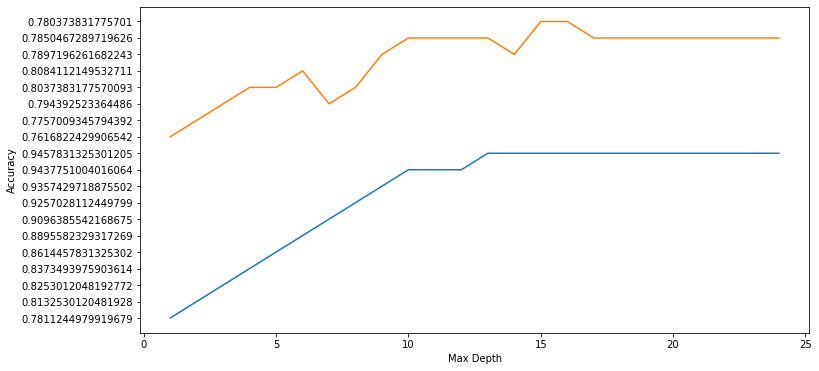

In [225]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_set_accuracy)
plt.plot(df.max_depth, df.validate_set_accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()
